**Discretization also called Binning:**

Discretization is the process of converting continuous numerical data into discrete categories or bins.


**Types:**


**1.   Unsupervised Binning:**
  *   Equal-Width Binning: Divides the range into bins of equal size.
  *   Equal-Frequency Binning: Ensures each bin has approximately the same number of data points.
  *   Clustering-Based Binning: Uses k-means or hierarchical clustering to create bins.



**2.   Supervised Binning**
  *   Decision Tree Binning: Uses decision trees (e.g., CART) to find optimal bin edges.





In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [147]:
df = pd.read_csv('/content/train.csv', usecols=['Age','Fare','Survived'])

In [148]:
df.isnull().sum(), df.shape

(Survived      0
 Age         177
 Fare          0
 dtype: int64,
 (891, 3))

In [149]:
df.dropna(inplace=True)

In [150]:
df.shape

(714, 3)

In [151]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
X_train.head(4)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750


In [154]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6223776223776224

In [155]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.6288732394366197

In [156]:
def discretize(bins,strategy):
  kbins = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
  trf = ColumnTransformer([
    ('Age', kbins, [0]),
    ('Fare', kbins, [1])
  ])
  X_train_trf = trf.fit_transform(X_train)
  X_test_trf = trf.transform(X_test)

  clf = DecisionTreeClassifier()
  clf.fit(X_train_trf, y_train)
  y_pred = clf.predict(X_test_trf)

  print(f"Bins: {bins} | Strategy: {strategy} | Accuracy: {accuracy_score(y_test, y_pred)}")
  print(trf.named_transformers_['Age'].n_bins_, trf.named_transformers_['Fare'].n_bins_)
  print(trf.named_transformers_['Age'].bin_edges_, trf.named_transformers_['Fare'].bin_edges_)
  X_train_trf = pd.DataFrame(X_train_trf, columns=['Age', 'Fare'])
  for i in X_train.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[i], label='Before Discretization' )
    plt.subplot(122)
    sns.histplot(X_train_trf[i], label='After Discretization')
    plt.show()

# 1. Unsupervised Binning



<h3>a. Equal-Width Binning<h3>

Formula: (max-min)/bins

* Handle Outliers
* Spread of the data remains the same

Bins: 10 | Strategy: uniform | Accuracy: 0.6783216783216783
[10] [10]
[array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ])                                       ] [array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ]


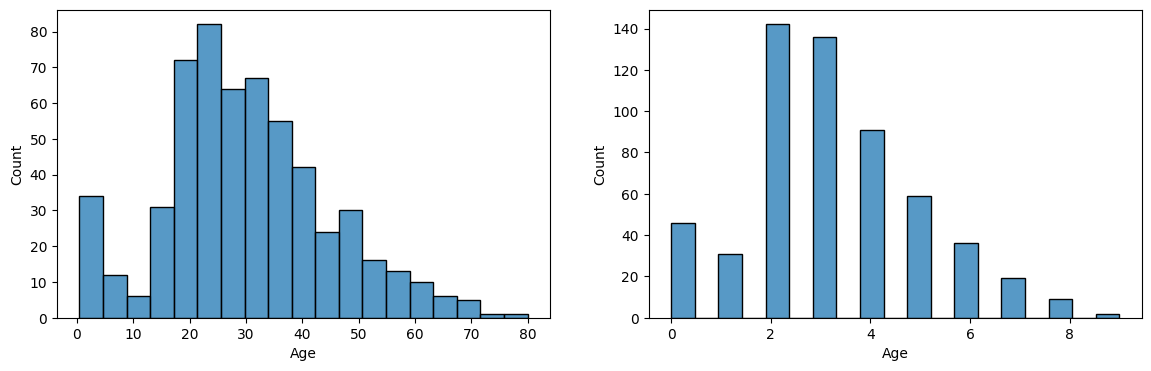

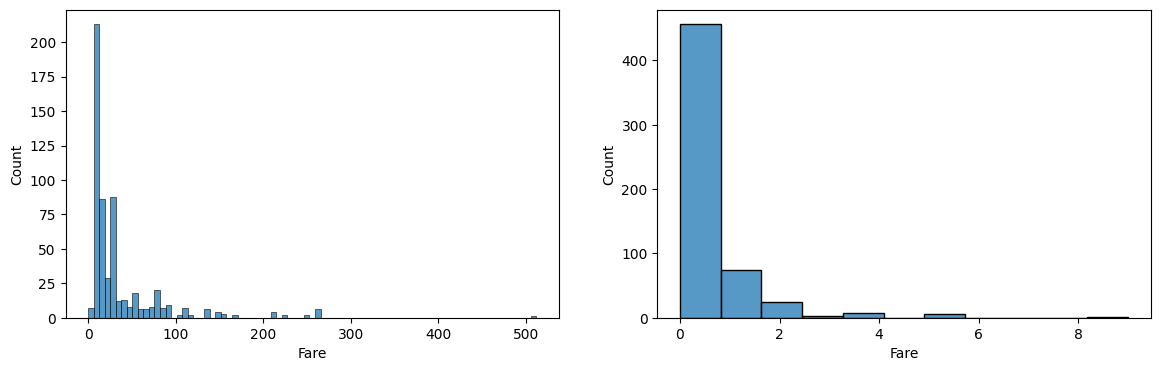

In [160]:
discretize(10, 'uniform')

<h3>b. Equal-Frequency Binning (quantile-based binning)</h3>

Formula: Points Per Bin= N/B

* Handle Outliers
* Handles Skewed Data

Bins: 10 | Strategy: quantile | Accuracy: 0.6223776223776224
[10] [10]
[array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
        50.  , 80.  ])                                                ] [array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
         26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ]


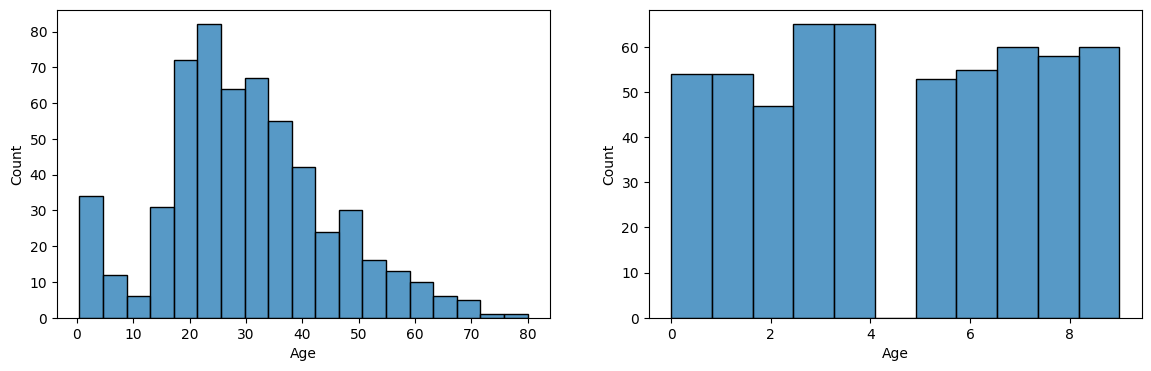

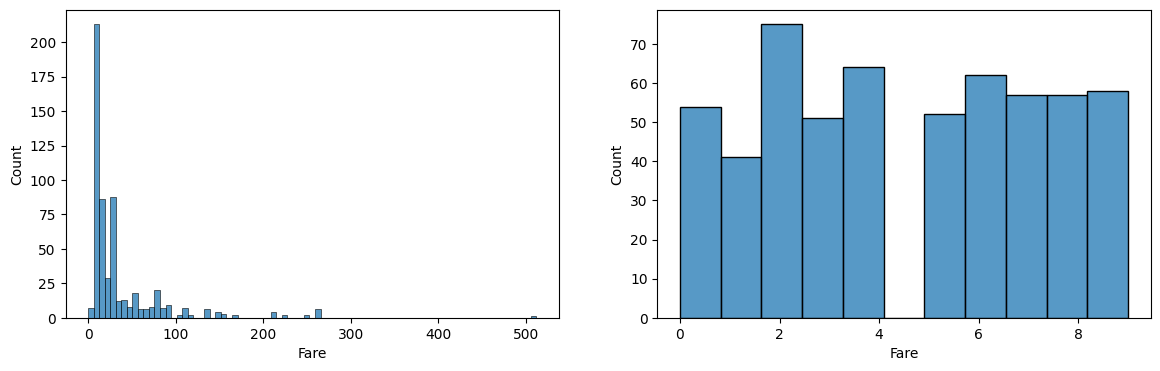

In [159]:
discretize(10, 'quantile')

<h3>c. Clustering-Based Binning (Kmean binning)</h3>

* Used when the data is spread in clusters


Bins: 10 | Strategy: kmeans | Accuracy: 0.6153846153846154
[10] [10]
[array([ 0.42      ,  8.95396298, 17.85460643, 24.83453636, 32.41986162,
        40.34522257, 48.11193503, 56.08004386, 64.26754386, 72.58333333,
        80.        ])                                                   ] [array([  0.        ,  18.31084718,  38.12143114,  62.67965675,
         84.02620056, 107.12413381, 138.32481   , 185.67419167,
        237.86718333, 385.651575  , 512.3292    ])             ]


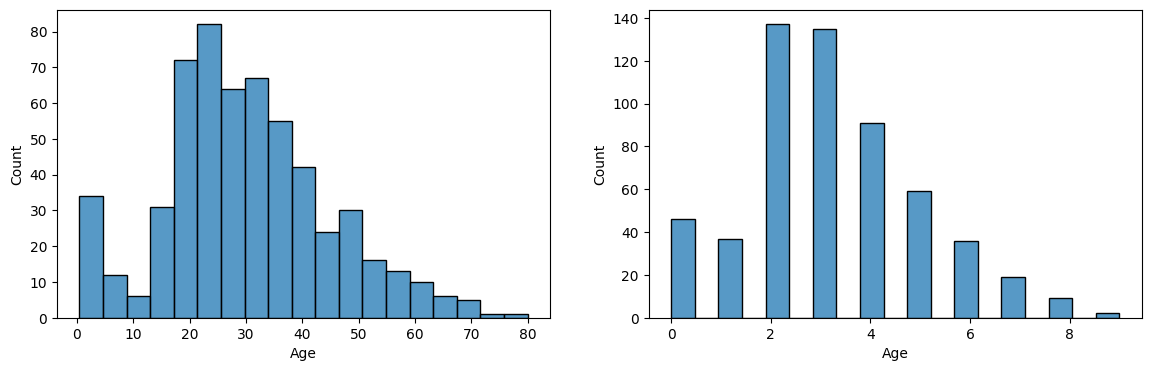

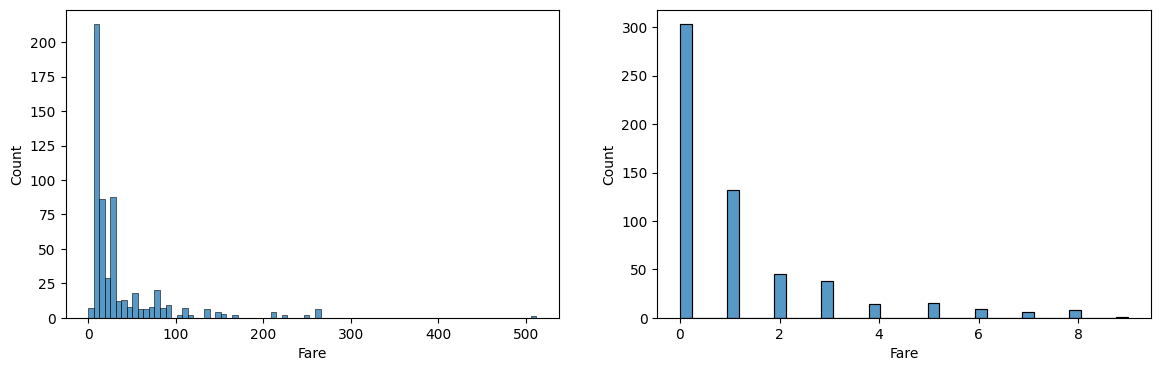

In [158]:
discretize(10, 'kmeans')